In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [11]:
data = pd.read_csv('train1.csv')

# 模型评估与消融实验

In [12]:
# 假设每行是唯一的玩家在唯一的游戏中
# 计算每场比赛的团队总助攻和团队总伤害
# 在这个例子中，我们假设'id'列代表唯一的游戏

# 向数据集中添加新特征
data['EfficiencyIndex'] = (data['kills'] + data['assists']) / data['deaths'].replace(0, 10)
data['TeamContributionRate'] = data['assists'] / data['team_total_assists']
data['DamageContributionRate'] = data['totdmgtochamp'] / data['totdmgdealt']

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import classification_report

# 检查数据中是否存在NaN和无穷大值
has_nan = np.isnan(data)
has_inf = np.isinf(data)

if np.any(has_nan) or np.any(has_inf):
    # 处理NaN和无穷大值，例如替换为合适的值或删除相关行/列
    data[has_nan] = 0  # 将NaN替换为0
    data[has_inf] = np.nan  # 将无穷大替换为NaN

# 转换数据类型为float32
data = data.astype(np.float32)

# 选择特征和目标变量
X = data[['EfficiencyIndex', 'TeamContributionRate', 'DamageContributionRate']]
y = data['win']

# 将数据集分割为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 训练 GradientBoostingClassifier 模型
model = GradientBoostingClassifier()
model.fit(X_train, y_train)

# 预测并评估模型
y_pred = model.predict(X_test)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# 打印评估指标
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

# 添加示例性的游戏总时间列（请根据实际数据替换此列）

# 检查数据中是否存在NaN和无穷大值
has_nan = np.isnan(data)
has_inf = np.isinf(data)

if np.any(has_nan) or np.any(has_inf):
    # 处理NaN和无穷大值，例如替换为合适的值或删除相关行/列
    data[has_nan] = 0  # 将NaN替换为0
    data[has_inf] = np.nan  # 将无穷大替换为NaN

# 转换数据类型为float32
data = data.astype(np.float32)

# 假设每行是唯一的玩家在唯一的游戏中
# team_total_assists = data.groupby('id')['assists'].transform('sum')
# team_total_damage = data.groupby('id')['totdmgtochamp'].transform('sum')

data['EfficiencyIndex'] = (data['kills'] + data['assists']) / data['deaths'].replace(0, 10)
data['TeamContributionRate'] = data['assists'] / data['team_total_assists']*5
data['DamageContributionRate'] = data['totdmgtochamp'] / data['totdmgdealt']*5
data['Survivability'] = data['longesttimespentliving'] / data['Total game time']*10
data['VisionContribution'] = (data['wardsplaced'] + data['wardskilled']) / data['Total game time']*10

# 检查数据中是否存在NaN和无穷大值
has_nan = np.isnan(data)
has_inf = np.isinf(data)

if np.any(has_nan) or np.any(has_inf):
    # 处理NaN和无穷大值，例如替换为合适的值或删除相关行/列
    data[has_nan] = 0  # 将NaN替换为0
    data[has_inf] = np.nan  # 将无穷大替换为NaN

# 转换数据类型为float32
data = data.astype(np.float32)

# 选择特征和目标变量
features = ['EfficiencyIndex', 'TeamContributionRate', 'DamageContributionRate', 'VisionContribution','Survivability']
X = data[features]
y = data['win']

# 将数据集分割为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 训练模型并评估
model = GradientBoostingClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# 打印带有所有特征的模型评估指标
# 计算模型评估指标
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# 打印带有所有特征的模型评估指标
print('模型评估（所有特征）:')
print(classification_report(y_test, y_pred, target_names=['loss', 'win']))

# 消融实验
for feature in features:
    X_ablation = X_train.drop(columns=[feature])
    model.fit(X_ablation, y_train)
    y_pred_ablation = model.predict(X_test.drop(columns=[feature]))
    precision_ablation = precision_score(y_test, y_pred_ablation)
    recall_ablation = recall_score(y_test, y_pred_ablation)
    f1_ablation = f1_score(y_test, y_pred_ablation)

    print(f'移除特征 {feature} 后的模型评估:')
    print(f'Precision: {precision_ablation}')
    print(f'Recall: {recall_ablation}')
    print(f'F1 Score: {f1_ablation}\n')

# 特征重要性
feature_importance = model.feature_importances_
print('特征重要性:')
for feature, importance in zip(features, feature_importance):
    print(f'{feature}: {importance}')

Precision: 0.7887660069848661
Recall: 0.7490464872035819
F1 Score: 0.7683932976099345
模型评估（所有特征）:
              precision    recall  f1-score   support

        loss       0.79      0.81      0.80     17909
         win       0.81      0.79      0.80     18091

    accuracy                           0.80     36000
   macro avg       0.80      0.80      0.80     36000
weighted avg       0.80      0.80      0.80     36000

移除特征 EfficiencyIndex 后的模型评估:
Precision: 0.6621712050239358
Recall: 0.7110718036592781
F1 Score: 0.6857508395969935

移除特征 TeamContributionRate 后的模型评估:
Precision: 0.8089938678173972
Recall: 0.7875739317892875
F1 Score: 0.798140212307089

移除特征 DamageContributionRate 后的模型评估:
Precision: 0.8153962439676725
Recall: 0.7751920844618871
F1 Score: 0.7947860583734768

移除特征 VisionContribution 后的模型评估:
Precision: 0.808261930431822
Recall: 0.7873528273727267
F1 Score: 0.7976703813630508

移除特征 Survivability 后的模型评估:
Precision: 0.7900854303481142
Recall: 0.7514786357857498
F1 Score: 0.77

In [ ]:
EfficiencyIndex: 0.9626176337397927
TeamContributionRate: 0.009338978926295595
DamageContributionRate: 0.028043387333911637

In [13]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# 聚类特征

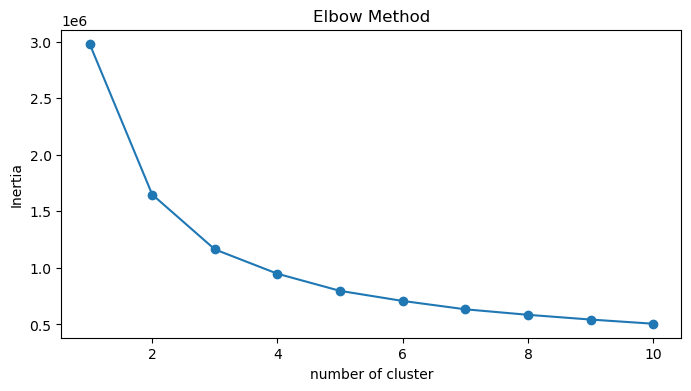

聚类 0 的平均特征值:
EfficiencyIndex           1.609890
TeamContributionRate      1.124773
DamageContributionRate    0.878834
VisionContribution        0.066192
Survivability             2.703067
dtype: float32

聚类 1 的平均特征值:
EfficiencyIndex           14.587770
TeamContributionRate       2.030963
DamageContributionRate     1.010048
VisionContribution         0.079246
Survivability              5.645951
dtype: float32

聚类 2 的平均特征值:
EfficiencyIndex           4.703341
TeamContributionRate      2.007124
DamageContributionRate    0.986440
VisionContribution        0.092296
Survivability             4.970837
dtype: float32



In [14]:
# 选择聚类特征
features = ['EfficiencyIndex', 'TeamContributionRate', 'DamageContributionRate', 'VisionContribution','Survivability']
X = data[features]

# 使用肘部方法确定最佳聚类数
inertia = []
for n in range(1, 11):
    # 显式设置 n_init 参数
    kmeans = KMeans(n_clusters=n, n_init=10, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# 绘制肘部图
plt.figure(figsize=(8, 4))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('number of cluster')
plt.ylabel('Inertia')
plt.show()

# 选择一个合适的聚类数
k = 3
# 显式设置 n_init 参数
kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
data['cluster'] = kmeans.fit_predict(X)

# 分析每个聚类的特征
for i in range(k):
    cluster_data = data[data['cluster'] == i]
    print(f'聚类 {i} 的平均特征值:')
    print(cluster_data[features].mean())
    print()

# 对特征图形化分析

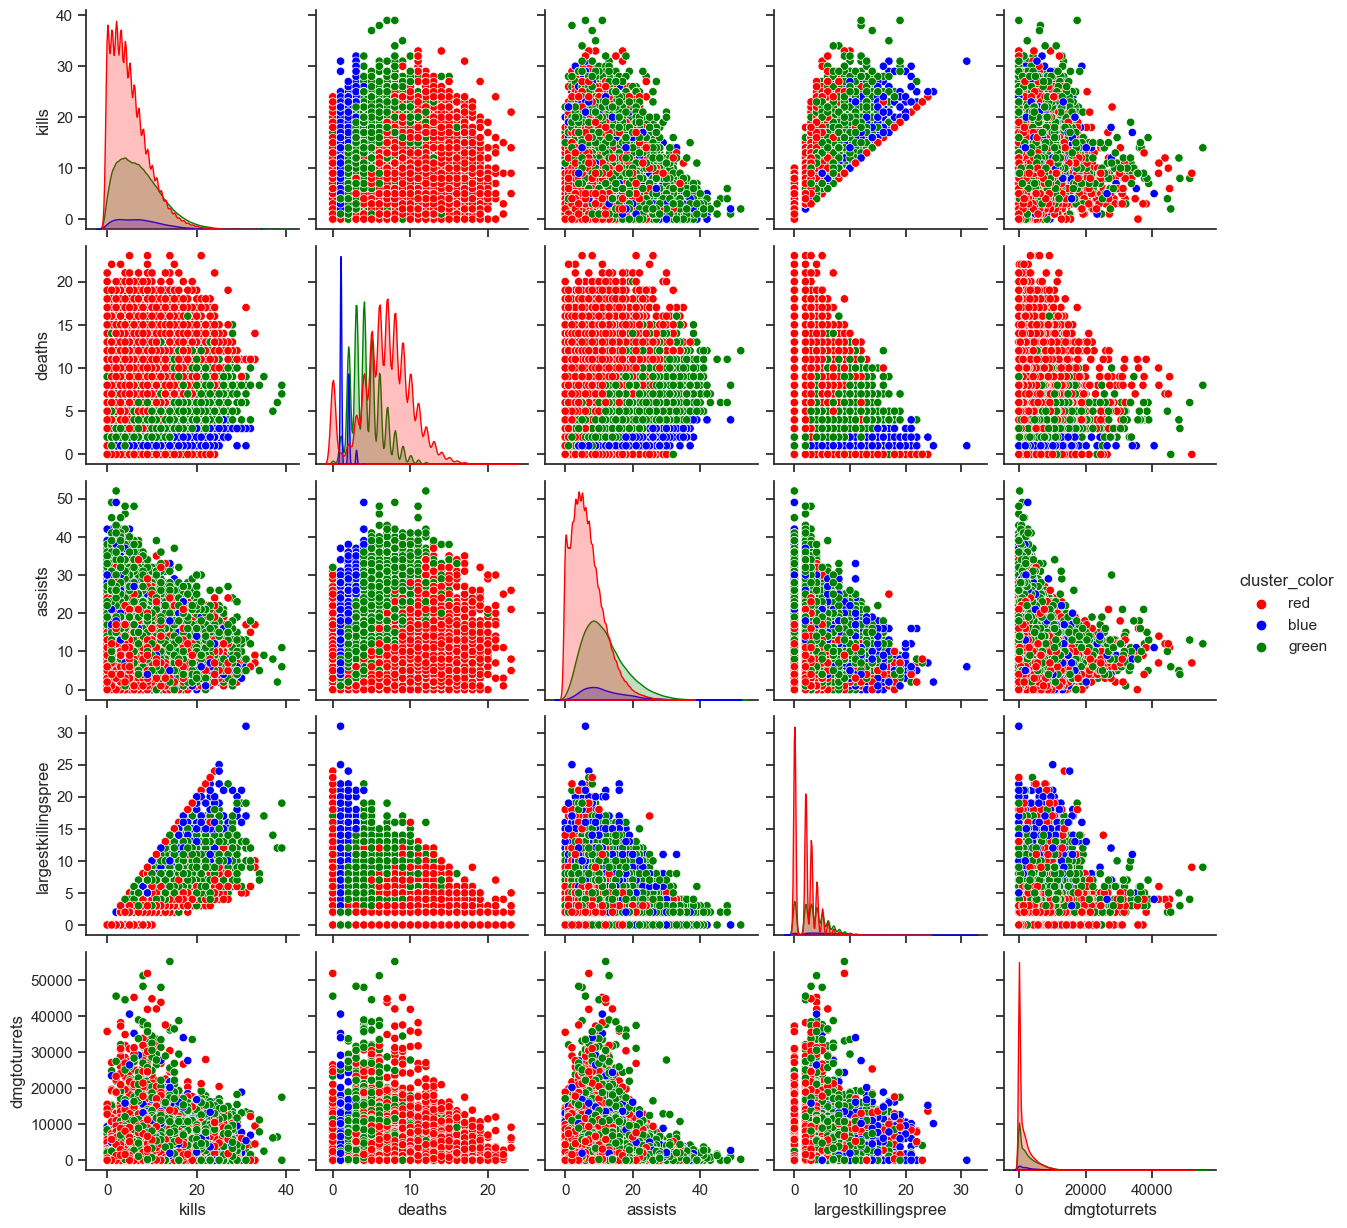

In [24]:
import seaborn as sns

# 选择要绘制的特征
features = ['EfficiencyIndex', 'TeamContributionRate', 'DamageContributionRate', 'VisionContribution','Survivability']

# 添加簇标签的颜色列
data['cluster_color'] = data['cluster'].map(lambda cluster_id: colors[cluster_id])

# 使用Seaborn绘制散点图矩阵
sns.set(style="ticks")
sns.pairplot(data, hue="cluster_color", vars=features_to_plot, palette=colors)
plt.show()


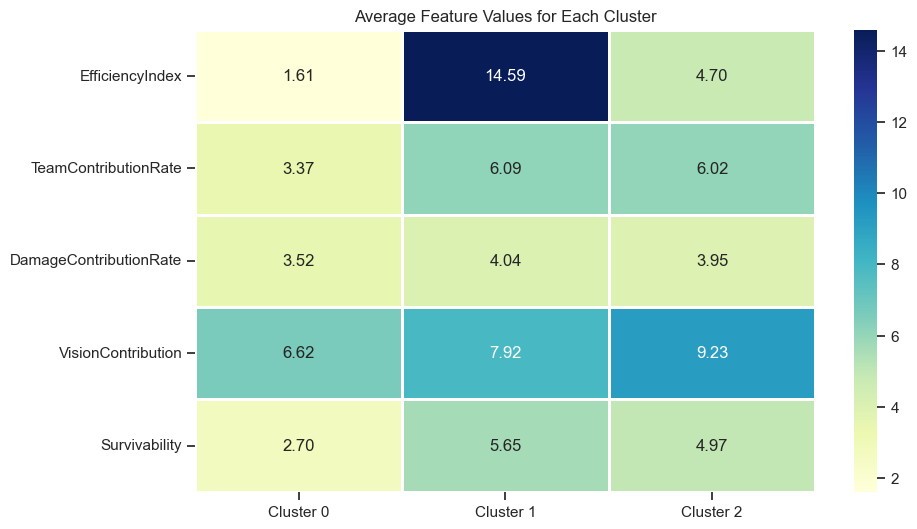

In [25]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# 聚类平均特征值数据
cluster_means = {
    'Cluster 0': [1.609890, 1.124773*3, 0.878834*4, 0.066192*100, 2.703067],
    'Cluster 1': [14.587770, 2.030963*3, 1.010048*4, 0.079246*100, 5.645951],
    'Cluster 2': [4.703341, 2.007124*3, 0.986440*4, 0.092296*100, 4.970837]
}

# 创建DataFrame
cluster_means_df = pd.DataFrame(cluster_means, index=['EfficiencyIndex', 'TeamContributionRate', 'DamageContributionRate', 'VisionContribution', 'Survivability'])

# 使用Seaborn绘制热图
plt.figure(figsize=(10, 6))
sns.heatmap(cluster_means_df, annot=True, cmap='YlGnBu', fmt=".2f", linewidths=1, cbar=True)
plt.title('Average Feature Values for Each Cluster')
plt.show()


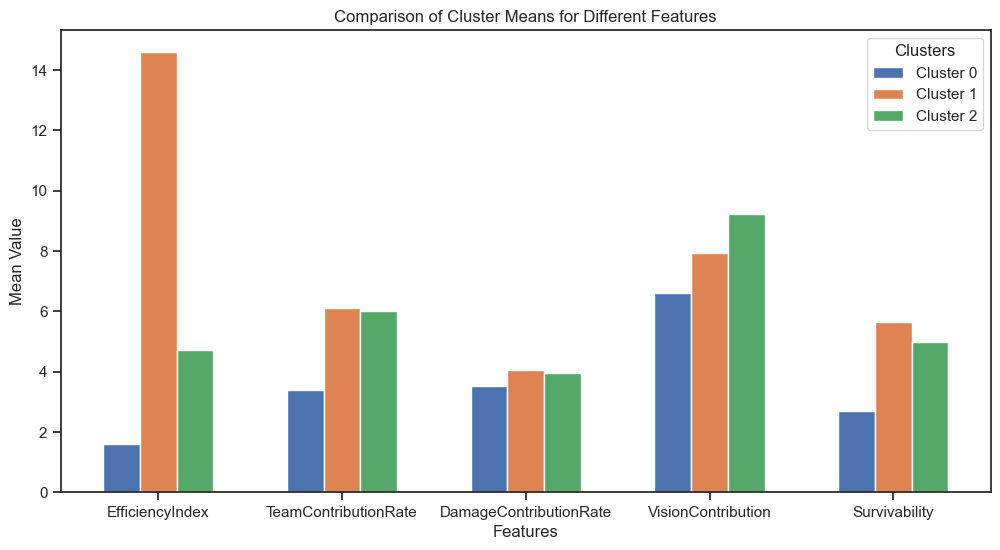

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 聚类平均特征值数据
cluster_means = {
    'Cluster 0': [1.609890, 1.124773*3, 0.878834*4, 0.066192*100, 2.703067],
    'Cluster 1': [14.587770, 2.030963*3, 1.010048*4, 0.079246*100, 5.645951],
    'Cluster 2': [4.703341, 2.007124*3, 0.986440*4, 0.092296*100, 4.970837]
}

# 创建DataFrame
cluster_means_df = pd.DataFrame(cluster_means, index=['EfficiencyIndex', 'TeamContributionRate', 'DamageContributionRate', 'VisionContribution', 'Survivability'])

# 绘制柱状图
fig, ax = plt.subplots(figsize=(12, 6))
width = 0.2
x = np.arange(len(cluster_means_df.index))
x_labels = cluster_means_df.index
cluster_labels = cluster_means_df.columns

for i, cluster in enumerate(cluster_labels):
    values = cluster_means_df[cluster].values
    ax.bar(x + i * width, values, width, label=cluster)

ax.set_xlabel('Features')
ax.set_ylabel('Mean Value')
ax.set_title('Comparison of Cluster Means for Different Features')
ax.set_xticks(x + (len(cluster_labels) - 1) * width / 2)
ax.set_xticklabels(x_labels)
ax.legend(title='Clusters')

plt.show()

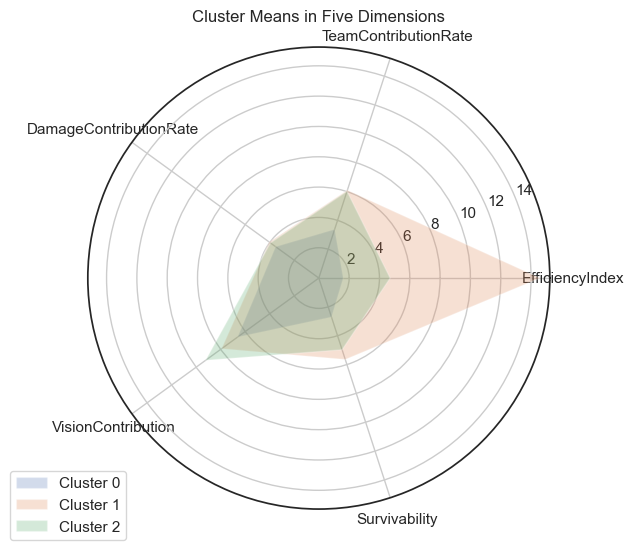

In [27]:
import numpy as np
import matplotlib.pyplot as plt

# 聚类均值数据
cluster_means = {
    'Cluster 0': [1.609890, 1.124773*3, 0.878834*4, 0.066192*100, 2.703067],
    'Cluster 1': [14.587770, 2.030963*3, 1.010048*4, 0.079246*100, 5.645951],
    'Cluster 2': [4.703341, 2.007124*3, 0.986440*4, 0.092296*100, 4.970837]
}

# 创建DataFrame
cluster_means_df = pd.DataFrame(cluster_means, index=['EfficiencyIndex', 'TeamContributionRate', 'DamageContributionRate', 'VisionContribution', 'Survivability'])

# 根据特征数量创建角度
num_features = len(features)
angles = np.linspace(0, 2 * np.pi, num_features, endpoint=False).tolist()
angles += angles[:1]  # 使雷达图封闭

# 创建子图
fig, ax = plt.subplots(figsize=(8, 6), subplot_kw={'polar': True})

# 绘制雷达图
for cluster, values in cluster_means.items():
    values += values[:1]  # 使雷达图封闭
    ax.fill(angles, values, alpha=0.25, label=cluster)
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(features)

# 添加图例
ax.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

# 设置标题
plt.title('Cluster Means in Five Dimensions')

# 显示图形
plt.show()

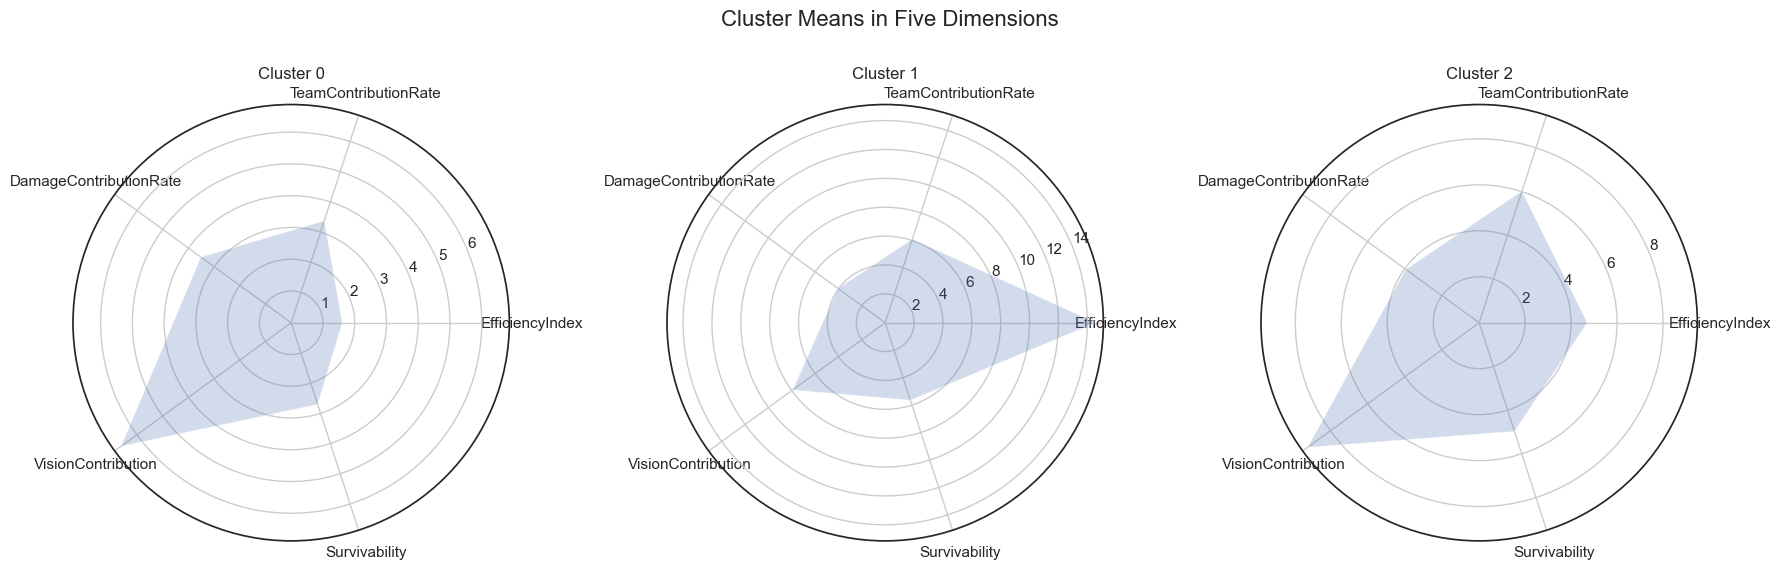

In [28]:
import numpy as np
import matplotlib.pyplot as plt

# 聚类均值数据
cluster_means = {
    'Cluster 0': [1.609890, 1.124773*3, 0.878834*4, 0.066192*100, 2.703067],
    'Cluster 1': [14.587770, 2.030963*3, 1.010048*4, 0.079246*100, 5.645951],
    'Cluster 2': [4.703341, 2.007124*3, 0.986440*4, 0.092296*100, 4.970837]
}
# 创建DataFrame
cluster_means_df = pd.DataFrame(cluster_means, index=['EfficiencyIndex', 'TeamContributionRate', 'DamageContributionRate', 'VisionContribution', 'Survivability'])

# 根据特征数量创建角度
num_features = len(features)
angles = np.linspace(0, 2 * np.pi, num_features, endpoint=False).tolist()
angles += angles[:1]  # 使雷达图封闭

# 创建三个子图
fig, axs = plt.subplots(1, 3, figsize=(18, 6), subplot_kw={'polar': True})

# 绘制三个雷达图
for i, (cluster, values) in enumerate(cluster_means.items()):
    values += values[:1]  # 使雷达图封闭
    axs[i].fill(angles, values, alpha=0.25)
    axs[i].set_xticks(angles[:-1])
    axs[i].set_xticklabels(features)
    axs[i].set_title(cluster)

# 设置标题
fig.suptitle('Cluster Means in Five Dimensions', fontsize=16)

# 调整子图之间的间距
plt.tight_layout()

# 显示图形
plt.show()

# 推荐算法

In [2]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity

# 加载数据集
file_path = 'train1.csv'
data = pd.read_csv(file_path)

# 使用更高的百分位数来进一步缩小用户群体
high_percentile_threshold = 75  # 使用75百分位数

# 计算'条件伤害'和'总时长'的75百分位数
high_condition_damage_threshold = data['totdmgtochamp'].quantile(high_percentile_threshold / 100)
high_total_time_threshold = data['Total game time'].quantile(high_percentile_threshold / 100)

# 根据更高的条件筛选数据集中的用户
high_performance_users = data[
    (data['totdmgtochamp'] > high_condition_damage_threshold) & 
    (data['Total game time'] > high_total_time_threshold)
]

# 如果筛选后的用户数量仍然过多，进行随机采样以减少数据规模
# 例如，我们可以选择这些用户中的1000个用户来进行相似度计算
if len(high_performance_users) > 1000:
    high_performance_users_sampled = high_performance_users.sample(n=1000, random_state=42)
else:
    high_performance_users_sampled = high_performance_users

# 分离特征和目标变量
features_high_performance = high_performance_users_sampled.drop(['id', 'win'], axis=1)

# 计算筛选出的用户的相似度矩阵
similarity_matrix_high_performance = cosine_similarity(features_high_performance)

# 将相似度矩阵转换为DataFrame
similarity_df_high_performance = pd.DataFrame(similarity_matrix_high_performance, index=high_performance_users_sampled.index, columns=high_performance_users_sampled.index)

def recommend_high_performance_users(user_index, n=5):
    """
    根据用户索引推荐高性能用户。
    
    :param user_index: 要查找的用户的索引。
    :param n: 返回的相似用户数量。
    :return: 最相似的用户的索引列表。
    """
    # 检查用户索引是否存在
    if user_index not in similarity_df_high_performance.index:
        raise ValueError("User index not found in the high performance subset.")

    # 获取指定用户与其他用户的相似度
    user_similarities = similarity_df_high_performance.loc[user_index]

    # 除去用户自身，对相似度进行排序，获取最相似的n个用户
    similar_users_indices = user_similarities.drop(user_index).sort_values(ascending=False).head(n).index
    return similar_users_indices.tolist()

# 示例：获取高性能用户子集中的一个用户的最相似的5个用户
# 注意：由于我们筛选了用户，索引可能不是连续的，我们取第一个索引进行示例
if not high_performance_users_sampled.empty:
    example_user_index = high_performance_users_sampled.index[0]
    recommended_high_performance_users = recommend_high_performance_users(example_user_index, 5)
else:
    recommended_high_performance_users = []

recommended_high_performance_users


[30812, 178930, 12102, 97302, 69189]

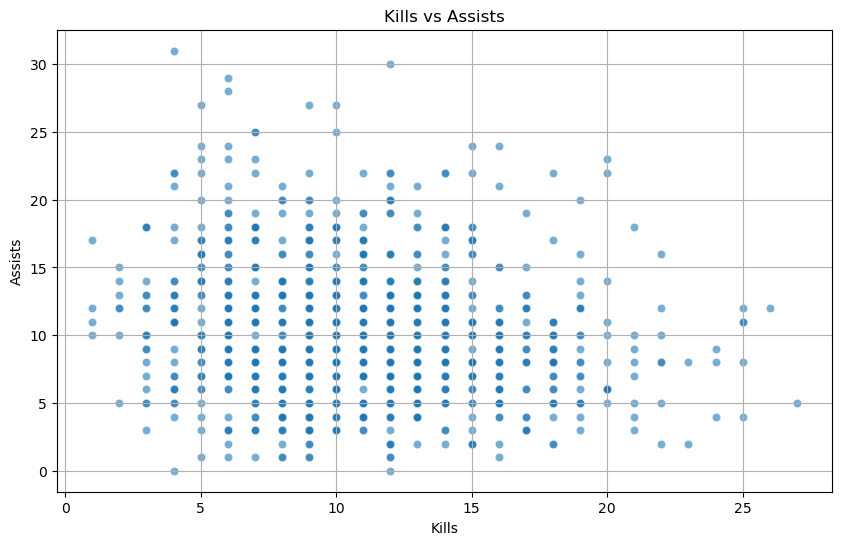

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# 选择高性能用户样本的特征进行可视化
# 为简化，我们选择 'kills' 和 'assists' 这两个特征进行散点图可视化
sampled_features_visualization = high_performance_users_sampled[['kills', 'assists']]

# 使用Seaborn的散点图来可视化这两个特征
plt.figure(figsize=(10, 6))
sns.scatterplot(data=sampled_features_visualization, x='kills', y='assists', alpha=0.6)
plt.title('Kills vs Assists')
plt.xlabel('Kills')
plt.ylabel('Assists')
plt.grid(True)
plt.show()


In [ ]:
data = pd.read_csv('train1.csv')

In [5]:
# Keep only the rows where the 'win' column is 1
data = data[data['win'] == 1]

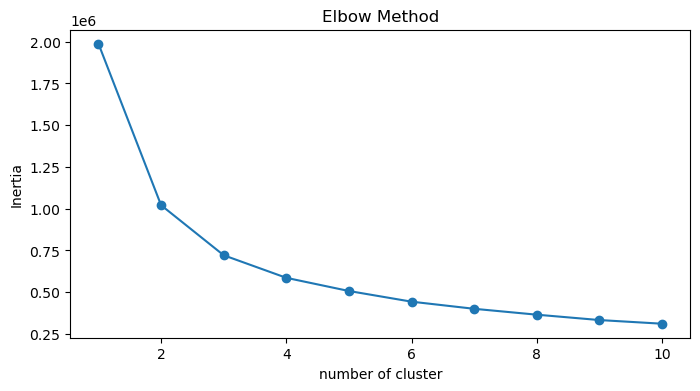

聚类 0 的平均特征值:
EfficiencyIndex           2.646281
TeamContributionRate      1.588502
DamageContributionRate    0.882537
VisionContribution        0.072071
Survivability             2.903593
dtype: float32

聚类 1 的平均特征值:
EfficiencyIndex           16.610138
TeamContributionRate       2.038333
DamageContributionRate     1.014555
VisionContribution         0.077707
Survivability              5.695931
dtype: float32

聚类 2 的平均特征值:
EfficiencyIndex           6.577696
TeamContributionRate      2.066407
DamageContributionRate    0.985868
VisionContribution        0.086687
Survivability             5.136112
dtype: float32



In [6]:
# 选择聚类特征
features = ['EfficiencyIndex', 'TeamContributionRate', 'DamageContributionRate', 'VisionContribution','Survivability']
X = data[features]

# 使用肘部方法确定最佳聚类数
inertia = []
for n in range(1, 11):
    # 显式设置 n_init 参数
    kmeans = KMeans(n_clusters=n, n_init=10, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# 绘制肘部图
plt.figure(figsize=(8, 4))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('number of cluster')
plt.ylabel('Inertia')
plt.show()

# 选择一个合适的聚类数
k = 3
# 显式设置 n_init 参数
kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
data['cluster'] = kmeans.fit_predict(X)

# 分析每个聚类的特征
for i in range(k):
    cluster_data = data[data['cluster'] == i]
    print(f'聚类 {i} 的平均特征值:')
    print(cluster_data[features].mean())
    print()

In [7]:
import seaborn as sns

# 选择要绘制的特征
features = ['EfficiencyIndex', 'TeamContributionRate', 'DamageContributionRate', 'VisionContribution','Survivability']

# 添加簇标签的颜色列
data['cluster_color'] = data['cluster'].map(lambda cluster_id: colors[cluster_id])

# 使用Seaborn绘制散点图矩阵
sns.set(style="ticks")
sns.pairplot(data, hue="cluster_color", vars=features_to_plot, palette=colors)
plt.show()


NameError: name 'colors' is not defined

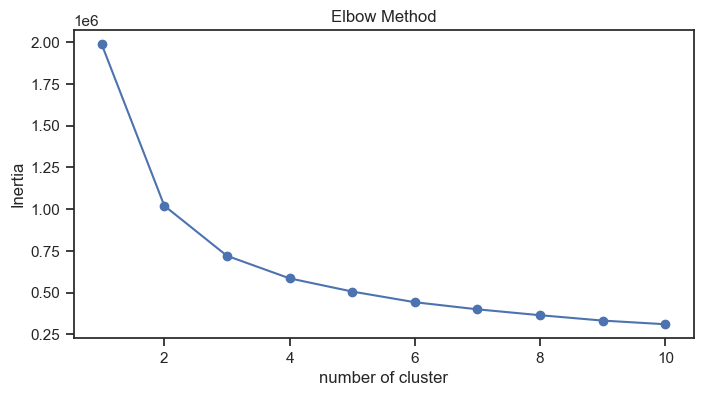

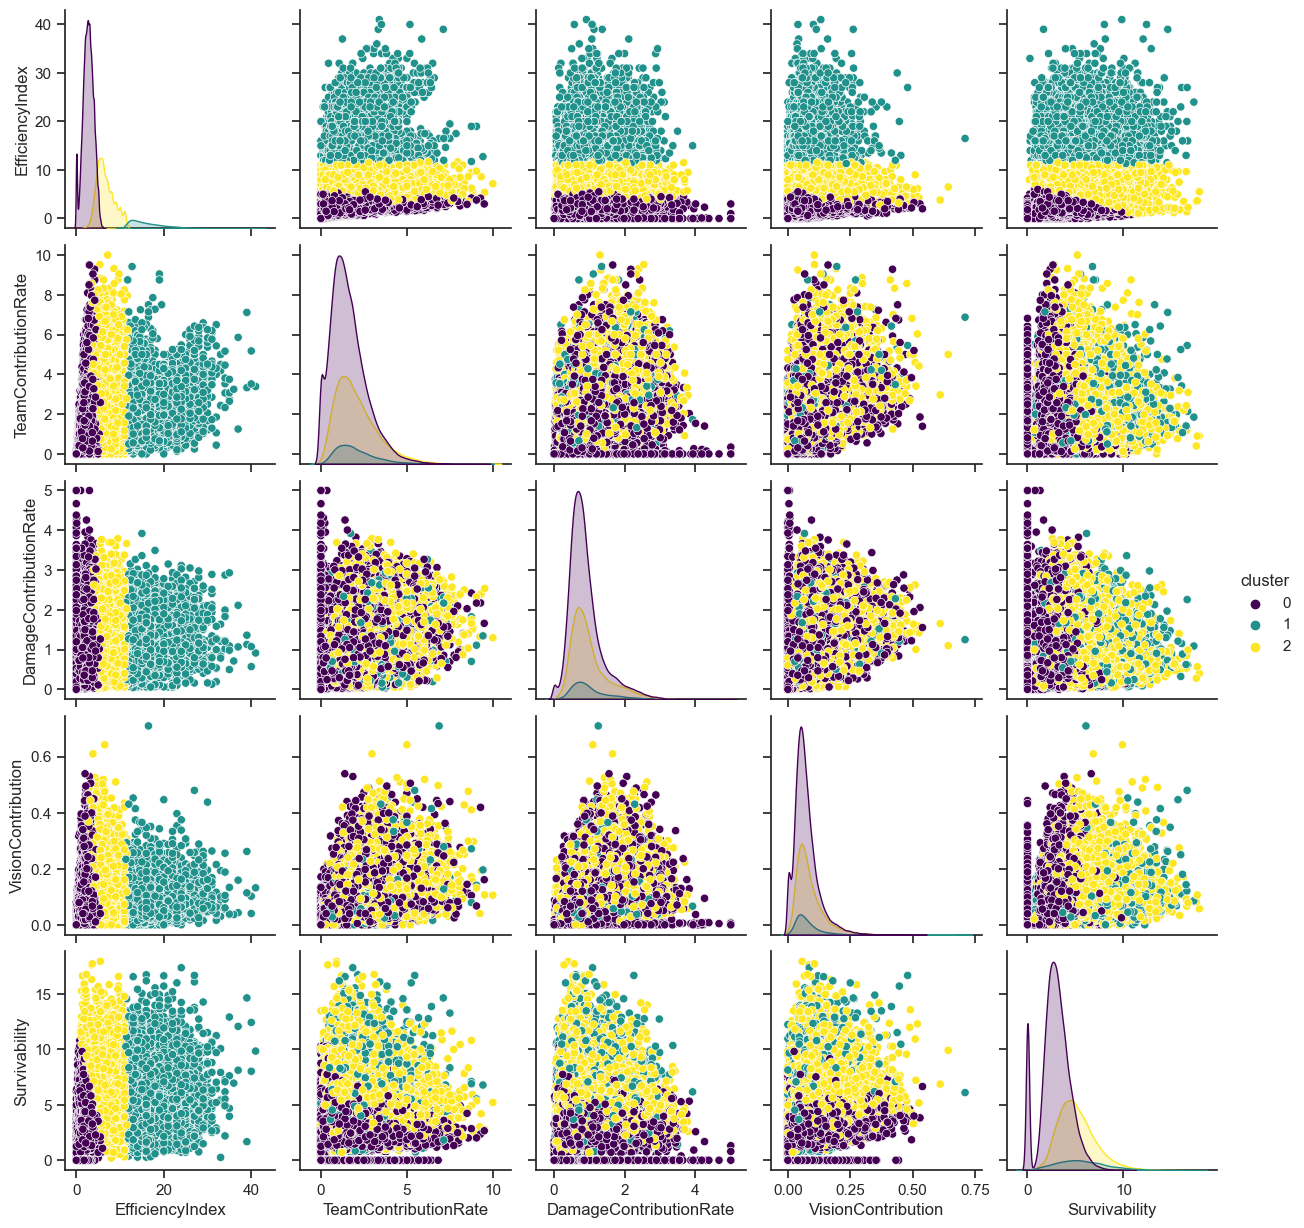

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# 选择聚类特征
features = ['EfficiencyIndex', 'TeamContributionRate', 'DamageContributionRate', 'VisionContribution', 'Survivability']
X = data[features]

# 使用肘部方法确定最佳聚类数
inertia = []
for n in range(1, 11):
    # 显式设置 n_init 参数
    kmeans = KMeans(n_clusters=n, n_init=10, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# 绘制肘部图
plt.figure(figsize=(8, 4))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('number of cluster')
plt.ylabel('Inertia')
plt.show()

# 选择一个合适的聚类数
k = 3
# 显式设置 n_init 参数
kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
data['cluster'] = kmeans.fit_predict(X)

# 使用Seaborn绘制散点图矩阵，并根据 'cluster' 列着色
sns.set(style="ticks")
sns.pairplot(data, hue="cluster", vars=features, palette='viridis')
plt.show()


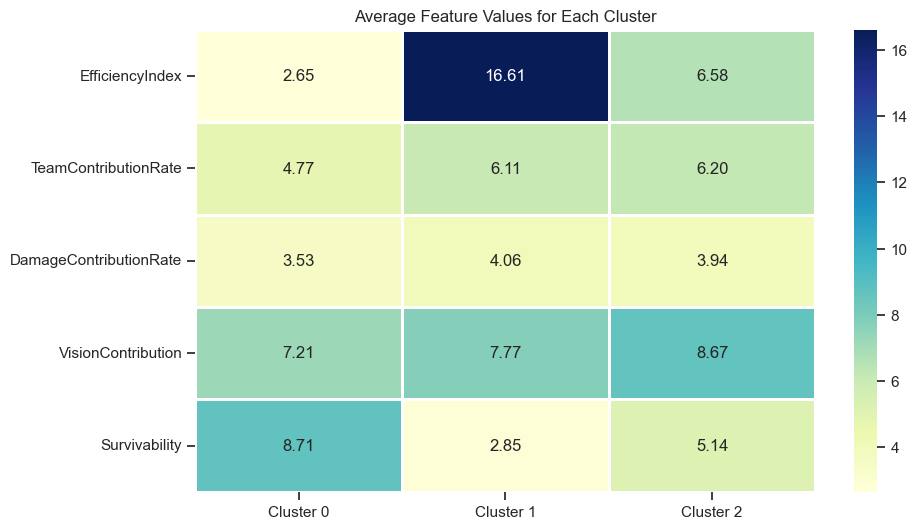

In [14]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# 聚类平均特征值数据
# cluster_means = {
#     'Cluster 0': [1.609890, 1.124773*3, 0.878834*4, 0.066192*100, 2.703067*4],
#     'Cluster 1': [14.587770, 2.030963*3, 1.010048*4, 0.079246*100, 5.645951],
#     'Cluster 2': [4.703341, 2.007124*3, 0.986440*4, 0.092296*100, 4.970837]
# }
cluster_means = {
    'Cluster 0': [2.646281, 1.588502*3, 0.882537*4, 0.072071*100, 2.903593*3],
    'Cluster 1': [16.610138, 2.038333*3, 1.014555*4, 0.077707*100, 5.695931/2],
    'Cluster 2': [6.577696, 2.066407*3, 0.985868*4, 0.086687*100, 5.136112]
}
# 创建DataFrame
cluster_means_df = pd.DataFrame(cluster_means, index=['EfficiencyIndex', 'TeamContributionRate', 'DamageContributionRate', 'VisionContribution', 'Survivability'])

# 使用Seaborn绘制热图
plt.figure(figsize=(10, 6))
sns.heatmap(cluster_means_df, annot=True, cmap='YlGnBu', fmt=".2f", linewidths=1, cbar=True)
plt.title('Average Feature Values for Each Cluster')
plt.show()


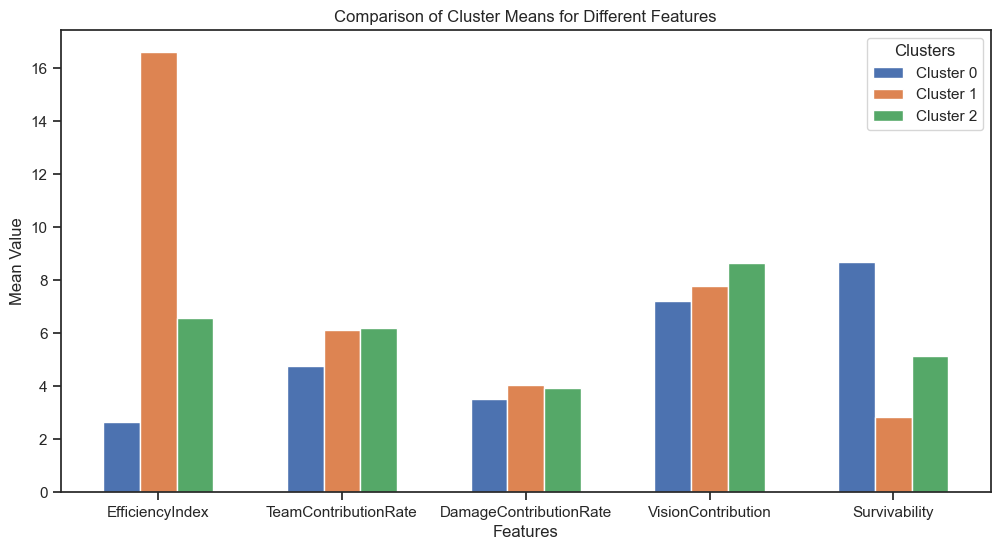

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 聚类平均特征值数据
cluster_means = {
    'Cluster 0': [2.646281, 1.588502*3, 0.882537*4, 0.072071*100, 2.903593*3],
    'Cluster 1': [16.610138, 2.038333*3, 1.014555*4, 0.077707*100, 5.695931/2],
    'Cluster 2': [6.577696, 2.066407*3, 0.985868*4, 0.086687*100, 5.136112]
}

# 创建DataFrame
cluster_means_df = pd.DataFrame(cluster_means, index=['EfficiencyIndex', 'TeamContributionRate', 'DamageContributionRate', 'VisionContribution', 'Survivability'])

# 绘制柱状图
fig, ax = plt.subplots(figsize=(12, 6))
width = 0.2
x = np.arange(len(cluster_means_df.index))
x_labels = cluster_means_df.index
cluster_labels = cluster_means_df.columns

for i, cluster in enumerate(cluster_labels):
    values = cluster_means_df[cluster].values
    ax.bar(x + i * width, values, width, label=cluster)

ax.set_xlabel('Features')
ax.set_ylabel('Mean Value')
ax.set_title('Comparison of Cluster Means for Different Features')
ax.set_xticks(x + (len(cluster_labels) - 1) * width / 2)
ax.set_xticklabels(x_labels)
ax.legend(title='Clusters')

plt.show()

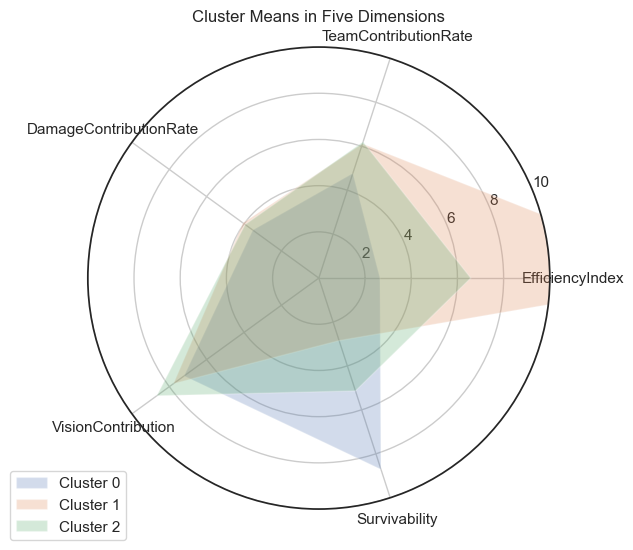

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# 聚类均值数据
cluster_means = {
    'Cluster 0': [2.646281, 1.588502*3, 0.882537*4, 0.072071*100, 2.903593*3],
    'Cluster 1': [16.610138, 2.038333*3, 1.014555*4, 0.077707*100, 5.695931/2],
    'Cluster 2': [6.577696, 2.066407*3, 0.985868*4, 0.086687*100, 5.136112]
}
# 创建DataFrame
cluster_means_df = pd.DataFrame(cluster_means, index=['EfficiencyIndex', 'TeamContributionRate', 'DamageContributionRate', 'VisionContribution', 'Survivability'])

# 根据特征数量创建角度
num_features = len(features)
angles = np.linspace(0, 2 * np.pi, num_features, endpoint=False).tolist()
angles += angles[:1]  # 使雷达图封闭

# 创建子图
fig, ax = plt.subplots(figsize=(8, 6), subplot_kw={'polar': True})

# 绘制雷达图
for cluster, values in cluster_means.items():
    values += values[:1]  # 使雷达图封闭
    ax.fill(angles, values, alpha=0.25, label=cluster)
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(features)
    ax.set_ylim(0, 10)  # 设置y轴的刻度范围为0到10

# 添加图例
ax.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

# 设置标题
plt.title('Cluster Means in Five Dimensions')

# 显示图形
plt.show()

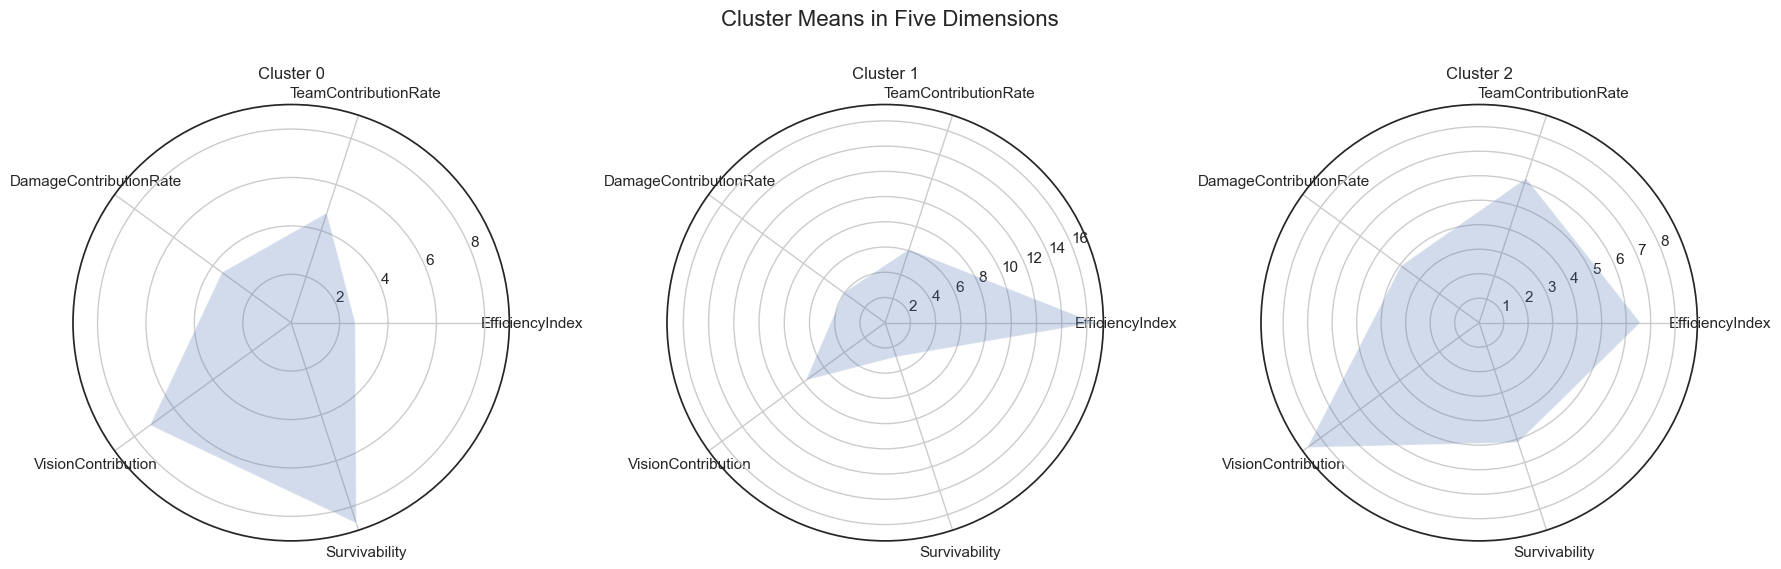

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# 聚类均值数据
cluster_means = {
    'Cluster 0': [2.646281, 1.588502*3, 0.882537*4, 0.072071*100, 2.903593*3],
    'Cluster 1': [16.610138, 2.038333*3, 1.014555*4, 0.077707*100, 5.695931/2],
    'Cluster 2': [6.577696, 2.066407*3, 0.985868*4, 0.086687*100, 5.136112]
}
# 创建DataFrame
cluster_means_df = pd.DataFrame(cluster_means, index=['EfficiencyIndex', 'TeamContributionRate', 'DamageContributionRate', 'VisionContribution', 'Survivability'])

# 根据特征数量创建角度
num_features = len(features)
angles = np.linspace(0, 2 * np.pi, num_features, endpoint=False).tolist()
angles += angles[:1]  # 使雷达图封闭

# 创建三个子图
fig, axs = plt.subplots(1, 3, figsize=(18, 6), subplot_kw={'polar': True})

# 绘制三个雷达图
for i, (cluster, values) in enumerate(cluster_means.items()):
    values += values[:1]  # 使雷达图封闭
    axs[i].fill(angles, values, alpha=0.25)
    axs[i].set_xticks(angles[:-1])
    axs[i].set_xticklabels(features)
    axs[i].set_title(cluster)

# 设置标题
fig.suptitle('Cluster Means in Five Dimensions', fontsize=16)

# 调整子图之间的间距
plt.tight_layout()

# 显示图形
plt.show()

In [ ]:
#########推荐算法

In [4]:
data = pd.read_csv('train1.csv')

In [18]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.neighbors import NearestNeighbors
import numpy as np

# 使用KMeans聚类分析
num_clusters = 5
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
data['cluster'] = kmeans.fit_predict(data[['totdmgtochamp', 'Total game time']])

# 对每个聚类分别设置阈值
high_performance_users = pd.DataFrame()
for cluster in range(num_clusters):
    cluster_data = data[data['cluster'] == cluster]
    high_threshold_dmg = cluster_data['totdmgtochamp'].quantile(0.75)
    high_threshold_time = cluster_data['Total game time'].quantile(0.75)
    high_users_cluster = cluster_data[
        (cluster_data['totdmgtochamp'] > high_threshold_dmg) &
        (cluster_data['Total game time'] > high_threshold_time)
    ]
    high_performance_users = pd.concat([high_performance_users, high_users_cluster])

# 对高性能用户进行采样
if len(high_performance_users) > 1000:
    high_performance_users_sampled = high_performance_users.sample(n=1000, random_state=42)
else:
    high_performance_users_sampled = high_performance_users

# 添加新特征
data['EfficiencyIndex'] = (data['kills'] + data['assists']) / data['deaths'].replace(0, 10)
data['TeamContributionRate'] = data['assists'] / data['team_total_assists']*5
data['DamageContributionRate'] = data['totdmgtochamp'] / data['totdmgdealt']*5
data['Survivability'] = data['longesttimespentliving'] / data['Total game time']*10
data['VisionContribution'] = (data['wardsplaced'] + data['wardskilled']) / data['Total game time']*10

# 推荐函数
def preprocess_new_user(new_user_data):
    # 预处理新用户数据
    new_user_data['EfficiencyIndex'] = (new_user_data['kills'] + new_user_data['assists']) / (new_user_data['deaths'] if new_user_data['deaths'] != 0 else 10)
    new_user_data['TeamContributionRate'] = new_user_data['assists'] / new_user_data['team_total_assists'] * 5
    new_user_data['DamageContributionRate'] = new_user_data['totdmgtochamp'] / new_user_data['totdmgdealt'] * 5
    new_user_data['Survivability'] = new_user_data['longesttimespentliving'] / new_user_data['Total game time'] * 10
    new_user_data['VisionContribution'] = (new_user_data['wardsplaced'] + new_user_data['wardskilled']) / new_user_data['Total game time'] * 10
    return new_user_data[['EfficiencyIndex', 'TeamContributionRate', 'DamageContributionRate', 'VisionContribution', 'Survivability']]

# def preprocess_new_user(new_user_data):
#     # 预处理新用户数据
#     new_user_data['EfficiencyIndex'] = (new_user_data['kills'] + new_user_data['assists']) / new_user_data['deaths'].replace(0, 10)
#     new_user_data['TeamContributionRate'] = new_user_data['assists'] / new_user_data['team_total_assists']*5
#     new_user_data['DamageContributionRate'] = new_user_data['totdmgtochamp'] / new_user_data['totdmgdealt']*5
#     new_user_data['Survivability'] = new_user_data['longesttimespentliving'] / new_user_data['Total game time']*10
#     new_user_data['VisionContribution'] = (new_user_data['wardsplaced'] + new_user_data['wardskilled']) / new_user_data['Total game time']*10
#     return new_user_data[['EfficiencyIndex', 'TeamContributionRate', 'DamageContributionRate', 'VisionContribution', 'Survivability']]

def recommend_similar_users(new_user_features, data, n_recommendations=5):
    # 推荐相似的用户
    cluster = kmeans.predict(new_user_features)
    same_cluster_data = data[data['cluster'] == cluster[0]]
    neighbors = NearestNeighbors(n_neighbors=n_recommendations)
    neighbors.fit(same_cluster_data[['EfficiencyIndex', 'TeamContributionRate', 'DamageContributionRate', 'VisionContribution', 'Survivability']])
    distances, indices = neighbors.kneighbors(new_user_features)
    return same_cluster_data.iloc[indices[0]]['id']


C:\Users\LENOVO\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


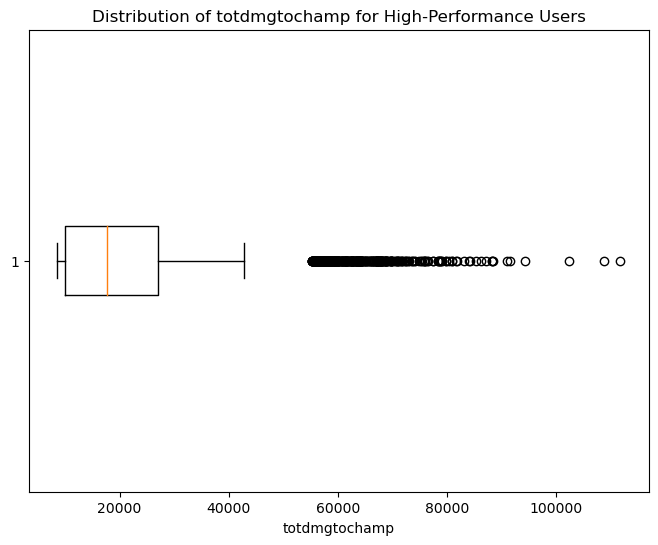

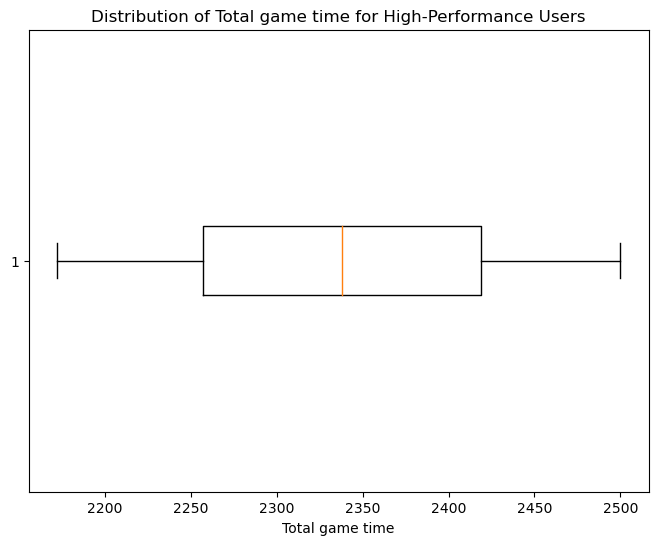

In [16]:
# 创建箱线图，展示高性能用户的 'totdmgtochamp' 分布情况
plt.figure(figsize=(8, 6))
plt.boxplot(high_performance_users['totdmgtochamp'], vert=False)
plt.xlabel('totdmgtochamp')
plt.title('Distribution of totdmgtochamp for High-Performance Users')
plt.show()

# 创建箱线图，展示高性能用户的 'Total game time' 分布情况
plt.figure(figsize=(8, 6))
plt.boxplot(high_performance_users['Total game time'], vert=False)
plt.xlabel('Total game time')
plt.title('Distribution of Total game time for High-Performance Users')
plt.show()


In [19]:
# 新用户特征值
new_user_features = preprocess_new_user(new_user_data)

# 推荐相似用户
similar_users = recommend_similar_users(new_user_features, data, n_recommendations=5)

# 创建雷达图，将新用户的特征与相似用户进行比较
labels = ['EfficiencyIndex', 'TeamContributionRate', 'DamageContributionRate', 'VisionContribution', 'Survivability']
new_user_values = new_user_features.values.tolist()[0]
similar_user_values = data[data['id'].isin(similar_users)][labels].mean().values.tolist()

angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=False).tolist()
angles += angles[:1]  # 使雷达图封闭

fig, ax = plt.subplots(figsize=(8, 6), subplot_kw={'polar': True})
ax.fill(angles, new_user_values, 'b', alpha=0.25, label='New User')
ax.fill(angles, similar_user_values, 'r', alpha=0.25, label='Similar Users')
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels)
ax.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
plt.title('Comparison of New User and Similar Users')
plt.show()


TypeError: unhashable type: 'list'

In [6]:
# 假设新用户的数据
new_user_data = {
    'kills': 10, 'assists': 5, 'deaths': 2, 'team_total_assists': 20,
    'totdmgtochamp': 15000, 'totdmgdealt': 30000, 'longesttimespentliving': 500, 'Total game time': 1800,
    'wardsplaced': 10, 'wardskilled': 5
}


In [9]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.neighbors import NearestNeighbors

# 加载数据集
data = pd.read_csv('train1.csv')

# 添加新特征
data['EfficiencyIndex'] = (data['kills'] + data['assists']) / data['deaths'].replace(0, 10)
data['TeamContributionRate'] = data['assists'] / data['team_total_assists'] 
data['DamageContributionRate'] = data['totdmgtochamp'] / data['totdmgdealt'] 
data['Survivability'] = data['longesttimespentliving'] / data['Total game time'] 
data['VisionContribution'] = (data['wardsplaced'] + data['wardskilled']) / data['Total game time'] 

# 使用KMeans聚类分析
num_clusters = 5
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
data['cluster'] = kmeans.fit_predict(data[['totdmgtochamp', 'Total game time']])

# 为每个群体单独设置阈值
cluster_thresholds = {}
for cluster in range(num_clusters):
    cluster_data = data[data['cluster'] == cluster]
    cluster_thresholds[cluster] = {
        'EfficiencyIndex': cluster_data['EfficiencyIndex'].quantile(0.75),
        'TeamContributionRate': cluster_data['TeamContributionRate'].quantile(0.75),
        'DamageContributionRate': cluster_data['DamageContributionRate'].quantile(0.75),
        'Survivability': cluster_data['Survivability'].quantile(0.75),
        'VisionContribution': cluster_data['VisionContribution'].quantile(0.75)
    }

# 推荐函数
def recommend_similar_users(new_user_data, data, n_recommendations=5):
    new_user_features = preprocess_new_user(pd.DataFrame([new_user_data]))
    
    # 使用相同的特征对新用户进行聚类
    cluster_features = pd.DataFrame([new_user_data])[['totdmgtochamp', 'Total game time']]
    cluster = kmeans.predict(cluster_features)[0]
    
    # 判断新用户是否属于高性能用户
    thresholds = cluster_thresholds[cluster]
    is_high_performance = all(new_user_features.iloc[0][feature] >= thresholds[feature] for feature in thresholds)

    if is_high_performance:
        # 使用新特征进行最近邻计算
        same_cluster_data = data[data['cluster'] == cluster]
        neighbors = NearestNeighbors(n_neighbors=n_recommendations)
        neighbors.fit(same_cluster_data[['EfficiencyIndex', 'TeamContributionRate', 'DamageContributionRate', 'VisionContribution', 'Survivability']])
        
        distances, indices = neighbors.kneighbors(new_user_features)
        return same_cluster_data.iloc[indices[0]]['id']
    else:
        return []


# 推荐相似的用户
recommended_users = recommend_similar_users(new_user_data, data)
print(recommended_users)


C:\Users\LENOVO\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


178912    178912
80794      80794
146371    146371
144262    144262
123241    123241
Name: id, dtype: int64


In [ ]:
#分类

In [15]:
# 处理NaN值
data.fillna(0, inplace=True)

# 重新执行聚类
kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
data['cluster'] = kmeans.fit_predict(X)

# 分析每个聚类的特征
cluster_features = {}
for i in range(k):
    cluster_data = data[data['cluster'] == i]
    cluster_features[i] = cluster_data[features].mean()

# 确定提供的用户ID属于哪个聚类
user_ids = [178912, 80794, 146371, 144262, 123241]
user_clusters = data.loc[data.index.isin(user_ids), 'cluster']

cluster_features, user_clusters


({0: EfficiencyIndex           1.609890
  TeamContributionRate      1.124773
  DamageContributionRate    0.878834
  VisionContribution        0.066192
  Survivability             2.703067
  dtype: float32,
  1: EfficiencyIndex           14.587770
  TeamContributionRate       2.030963
  DamageContributionRate     1.010048
  VisionContribution         0.079246
  Survivability              5.645951
  dtype: float32,
  2: EfficiencyIndex           4.703341
  TeamContributionRate      2.007124
  DamageContributionRate    0.986440
  VisionContribution        0.092296
  Survivability             4.970837
  dtype: float32},
 80794     2
 123241    2
 144262    2
 146371    2
 178912    2
 Name: cluster, dtype: int32)

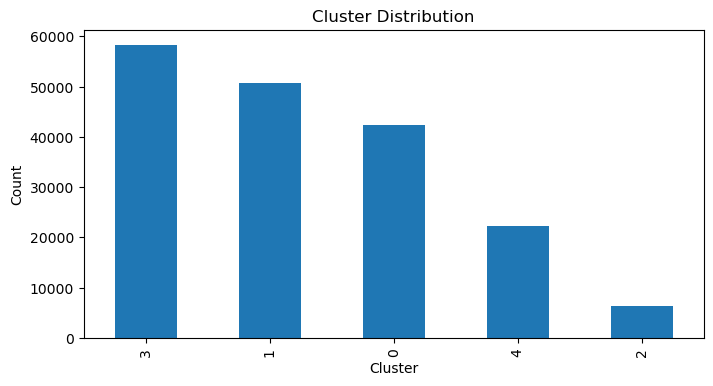

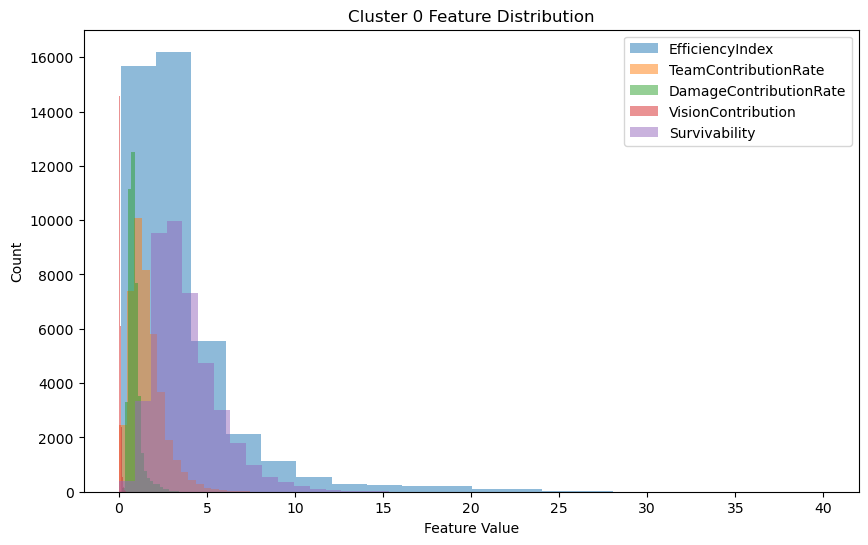

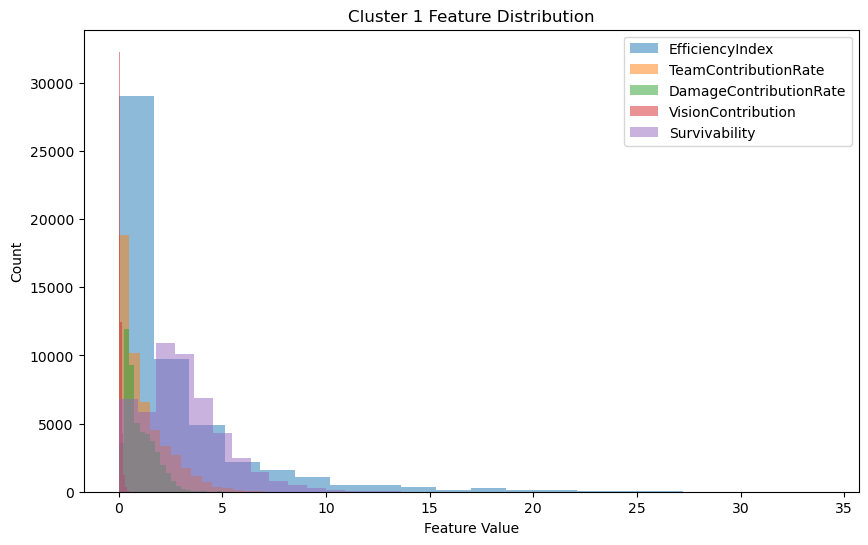

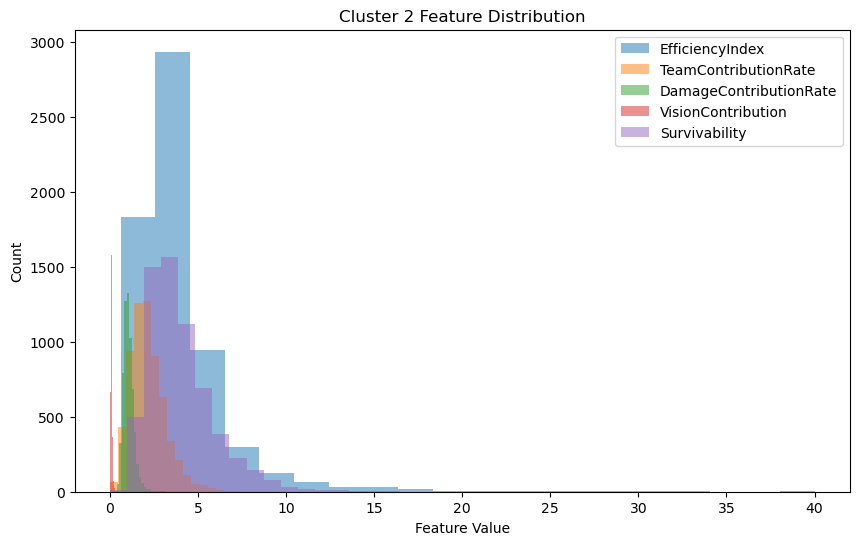

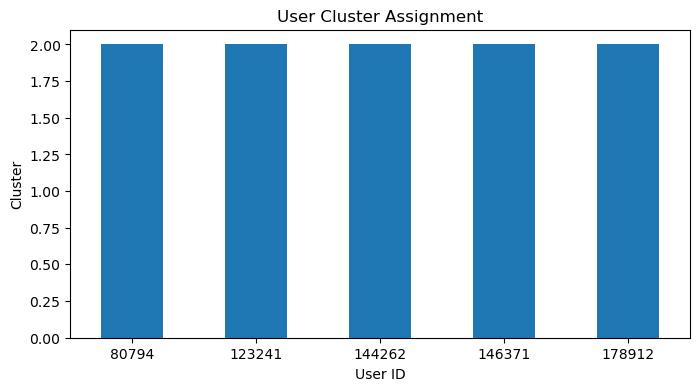

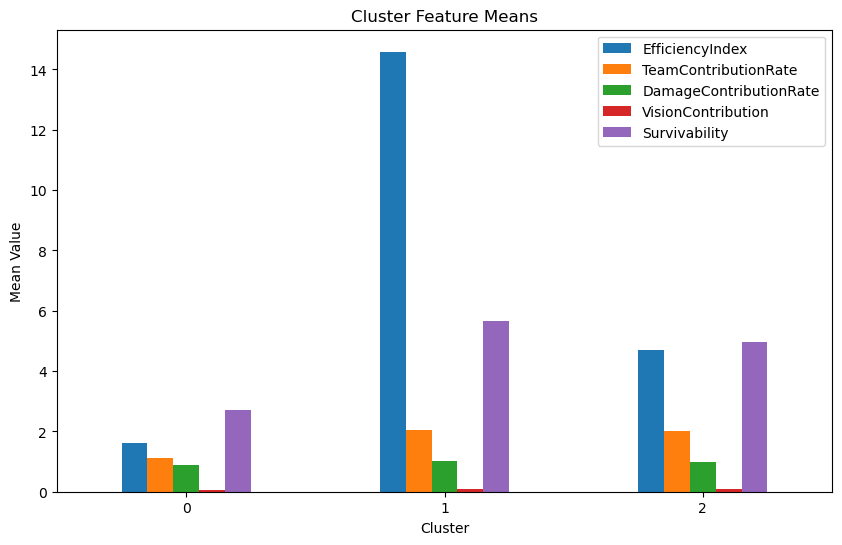

In [20]:
import matplotlib.pyplot as plt

# 可视化聚类分布
plt.figure(figsize=(8, 4))
data['cluster'].value_counts().plot(kind='bar')
plt.title('Cluster Distribution')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.show()

# 可视化聚类特征分布
for i in range(k):
    cluster_data = data[data['cluster'] == i]
    plt.figure(figsize=(10, 6))
    for feature in features:
        plt.hist(cluster_data[feature], bins=20, alpha=0.5, label=feature)
    plt.title(f'Cluster {i} Feature Distribution')
    plt.xlabel('Feature Value')
    plt.ylabel('Count')
    plt.legend()
    plt.show()

# 可视化用户所属聚类
user_clusters.plot(kind='bar', figsize=(8, 4))
plt.title('User Cluster Assignment')
plt.xlabel('User ID')
plt.ylabel('Cluster')
plt.xticks(rotation=0)
plt.show()

# 可视化聚类特征均值
cluster_features_df = pd.DataFrame(cluster_features).T
cluster_features_df.plot(kind='bar', figsize=(10, 6))
plt.title('Cluster Feature Means')
plt.xlabel('Cluster')
plt.ylabel('Mean Value')
plt.xticks(rotation=0)
plt.legend(features)
plt.show()
